# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=np.array([[3,1],[2,1]])
np.linalg.inv(A)@np.array([1,0])    # [m,b]=A^{-1}*[1,0]
                                    # linalg.inv -> inversa. @ -> multiplicación matricial

array([ 1., -2.])

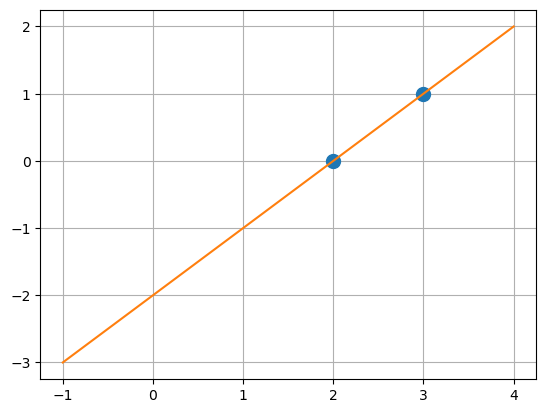

In [3]:
x=[3,2]
y=[1,0]
plt.plot(x,y,'o',ms=10)
x=np.linspace(-1,4,10)
m=1
b=-2
y=m*x+b
plt.plot(x,y)
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
b=np.array([1,0,1])
A=np.array([[1,0,0],
            [1,1,1],
            [1,2,4]])
B=np.linalg.inv(A)@b
B

array([ 1., -2.,  1.])

In [5]:
B[0],B[1],B[2] # Así accedemos a los valores de 'B'

(1.0, -2.0, 1.0)

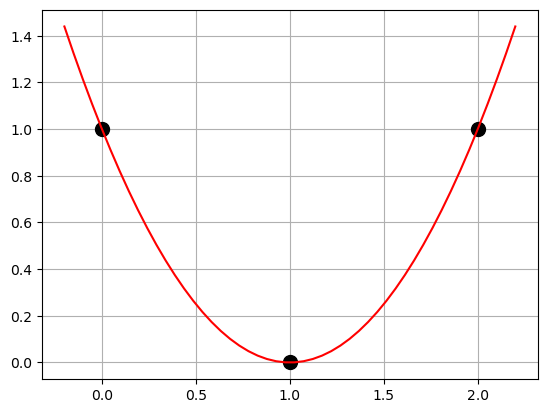

In [8]:
x=[0,1,2]
y=[1,0,1]
plt.plot(x,y,'ok',ms=10)
x=np.linspace(-0.2,2.2,50)
y=B[0]+B[1]*x+B[2]*x**2 # Este es el modelo
plt.plot(x,y,'r')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [9]:
import scipy.optimize as opt

In [14]:
opt.minimize?

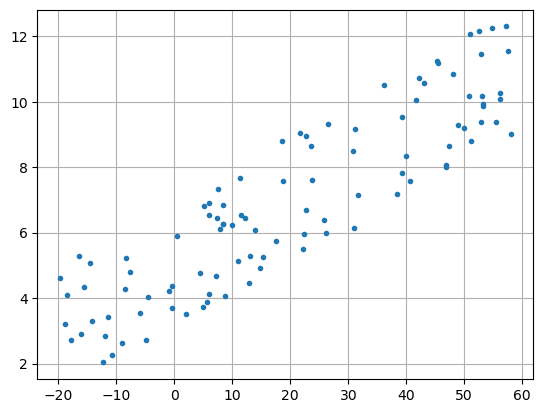

In [13]:
# Definimos los puntos para ajustar
x=np.random.uniform(-20,60,100)
y=1/10*x+5+np.random.uniform(-2,2,100)
plt.plot(x,y,'o',ms=3)
plt.grid()

In [15]:
# Ajuste de una recta
# 
# f=B[0]+B[1]*x, optimizamos para 'B'
def fun(B,x,y):             # Función objetivo (a minimizar)
    f=B[0]+B[1]*x
    return np.sum((y-f)**2) # sumatoria de las diferencias al cuadrado
beta0=np.random.rand(2)     # Necesitamos dos valores (aleatorios) para la evaluación inicial

In [16]:
sol=opt.minimize(fun,beta0,args=(x,y))
sol

      fun: 148.41588548159555
 hess_inv: array([[ 7.92870440e-03, -1.62426830e-04],
       [-1.62426830e-04,  8.61547109e-06]])
      jac: array([-1.33514404e-05,  8.85009766e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 135
      nit: 4
     njev: 41
   status: 2
  success: False
        x: array([4.86986458, 0.10270687])

In [17]:
# suma de errores mínimos al cuadrado
sol.fun

148.41588548159555

In [18]:
# Parámetros óptimos
sol.x

array([4.86986458, 0.10270687])

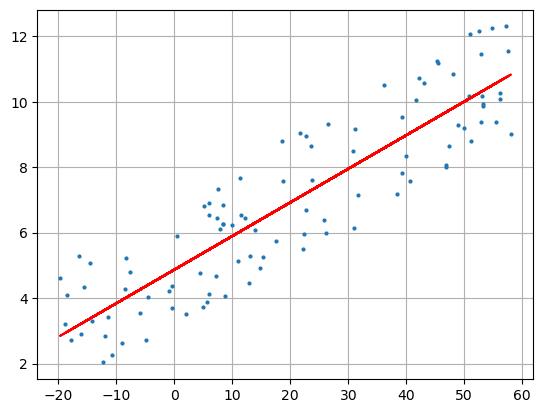

In [19]:
# Gráfica
plt.plot(x,y,'o',ms=2)
f=sol.x[0]+sol.x[1]*x # Modelo óptimo
plt.plot(x,f,'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

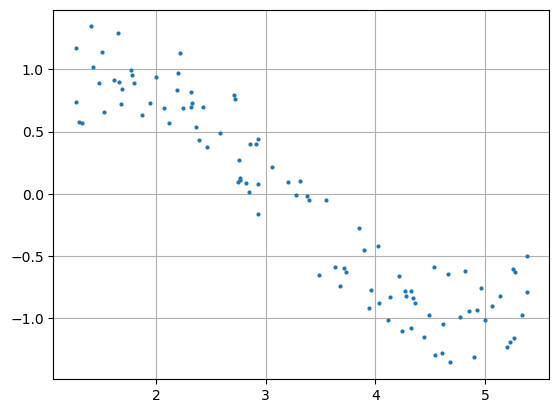

In [21]:
x=np.random.uniform(2/5*np.pi,7/4*np.pi,100)
y=np.sin(x)+np.random.uniform(-0.4,0.4,100)
plt.plot(x,y,'o',ms=2)
plt.grid()

In [22]:
# Ajuste lineal
beta0=np.random.rand(2)
sol=opt.minimize(fun,beta0,args=(x,y)) # Mínimos cuadrados
sol

      fun: 8.307123101742047
 hess_inv: array([[ 0.03997409, -0.01053283],
       [-0.01053283,  0.00317208]])
      jac: array([-1.1920929e-07, -1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 1.86395325, -0.58600538])

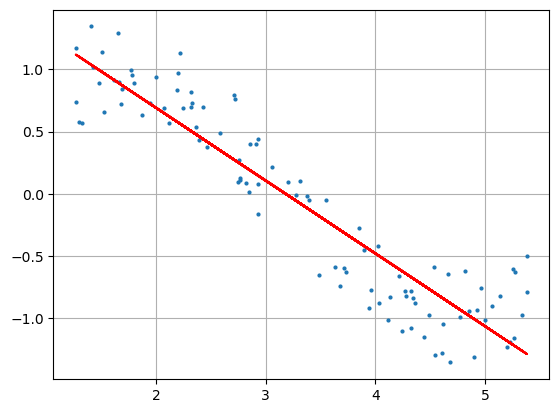

In [23]:
# Gráfica
plt.plot(x,y,'o',ms=2)
f=sol.x[0]+sol.x[1]*x # Modelo óptimo
plt.plot(x,f,'r')
plt.grid()

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.